In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import random
import pandas as pd
import codecs

In [2]:
# read data
fylke_data   = eval(codecs.open('fylke_data.txt', 'r', 'utf-8').read())
kommune_data = eval(codecs.open('kommune_data.txt', 'r','utf-8' ).read())

In [3]:
# read data into useable dataframes
def read_data_to_pd(data, nummer_name):  
    nummer, n, coordinates = [], [], []
    for i in range(len(data['features'])):
        nummer.append(data['features'][i]['properties'][nummer_name])
        n.append(data['features'][i]['properties']['n'])
        coordinates.append(data['features'][i]['geometry']['coordinates'])
    
    return nummer, n, coordinates

kdf = pd.DataFrame()
kdf['kommune_number'], kdf['kommune_name'], kdf['kommune_coord'] = read_data_to_pd(kommune_data, 'kommunenummer')

fdf = pd.DataFrame()
fdf['fylke_number'], fdf['fylke_name'], fdf['fylke_coord'] = read_data_to_pd(fylke_data, 'fylkenummer')

In [9]:
# geo_mapping function (based on region names)
def geo_map(regions, data, selection_type, df):
  
    
    #Creates name and coord variables, will be used in finding n and coords
    name = '{}_name'.format(selection_type)
    coord_name = '{}_coord'.format(selection_type)
        
    # normalize the input 
    norm = [float(i)/max(data) for i in data]

    # get color map
    cmap = matplotlib.cm.get_cmap('Reds')

    # get the right colors
    colors = []
    for n in range(len(norm)):
        c = matplotlib.colors.rgb2hex(cmap(norm[n])[:3])
        colors.append(c)  
  
    # init figure
    plt.figure(figsize = (8,8))
    
    error = []
    # plot and fill regions
    for region in regions:

        n = np.where(df[name] == region)[0][0]
        try:
            coords = df[df[name] == region][coord_name].item()
            x = [i for i,j in coords[0]]
            y = [j for i,j in coords[0]]
            plt.fill(x, y, colors[n], linewidth = .3, edgecolor = 'black')
            
        except:
            error.append(region)
    
    plot_params(plt, selection_type)
    return(error)

In [5]:
# Plotting formatting function
def plot_params(plt, selection_type):
        
    plt.title('Norwegian {}s'.format(selection_type), fontsize = 18)
    
    plt.axis('off')
         
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,        # ticks along the bottom edge are off
        right=False,       # ticks along the top edge are off
        labelleft=False)   # labels along the bottom edge are off

    return(plt)

# Test Routine

- Loading a list of kommunes and fylkes and
- Generating random data

In [6]:
# load regions
kommunes  = eval(codecs.open('kommune_list.txt', 'r', 'utf-8').read())
fylkes    = eval(codecs.open('fylke_list.txt', 'r', 'utf-8').read())

# generate random data
data_fylke = random.sample(range(1000), len(fylkes))
data_kommune = random.sample(range(1000), len(kommunes))

[]

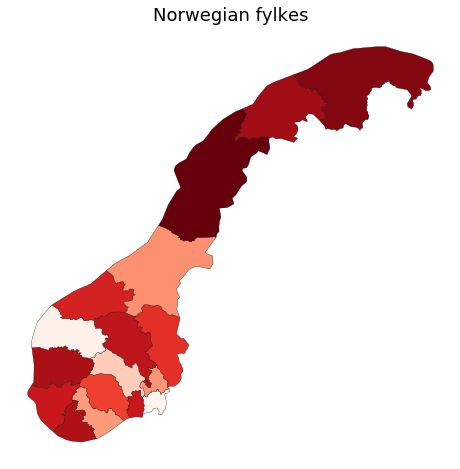

In [10]:
geo_map(fylkes, data_fylke, 'fylke', fdf)

['Bø', 'Herøy', 'Sande', 'Nes', 'Våler', 'Os']

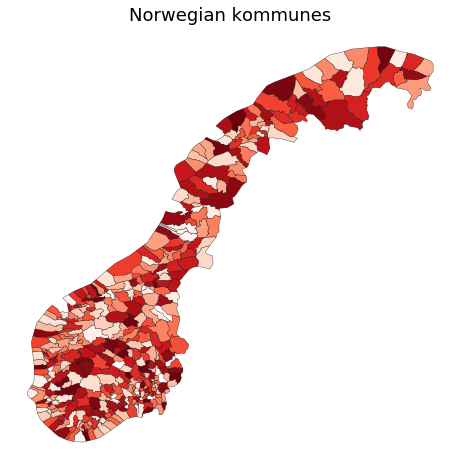

In [11]:
geo_map(kommunes, data_kommune, 'kommune', kdf)